Model Performance Metrics on Extended Dataset:
R² Score: 0.9168
Mean Absolute Error (MAE): 0.1773
Root Mean Squared Error (RMSE): 0.2330


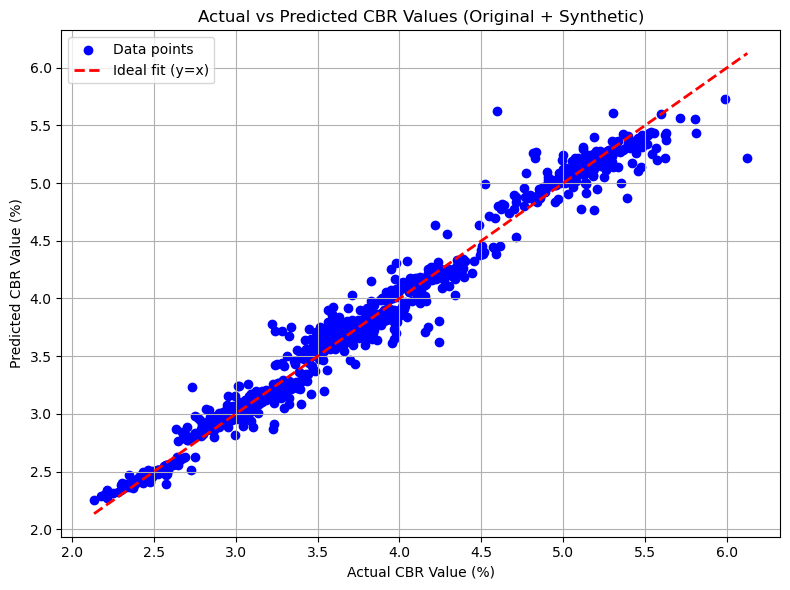

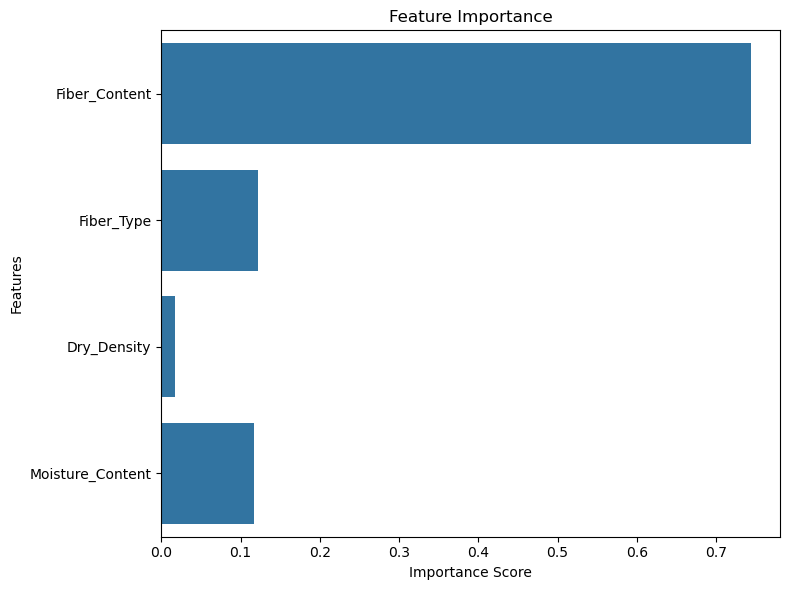

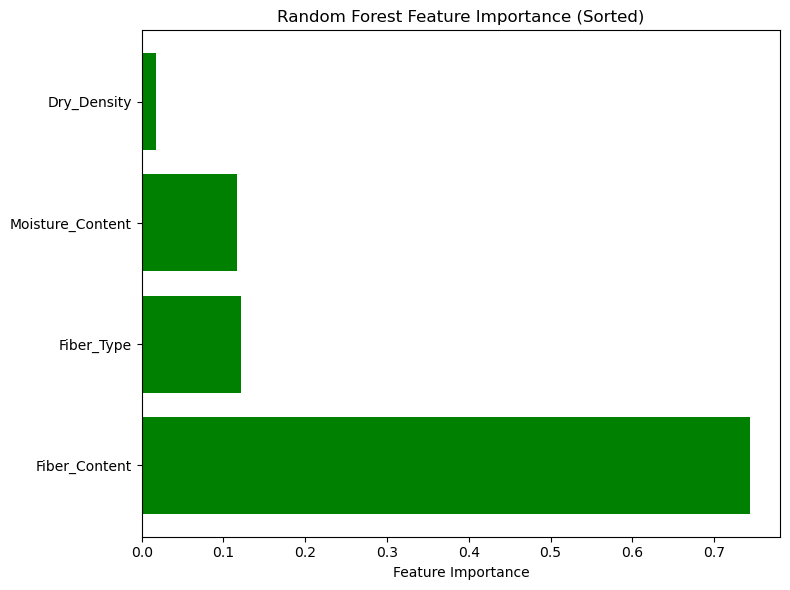

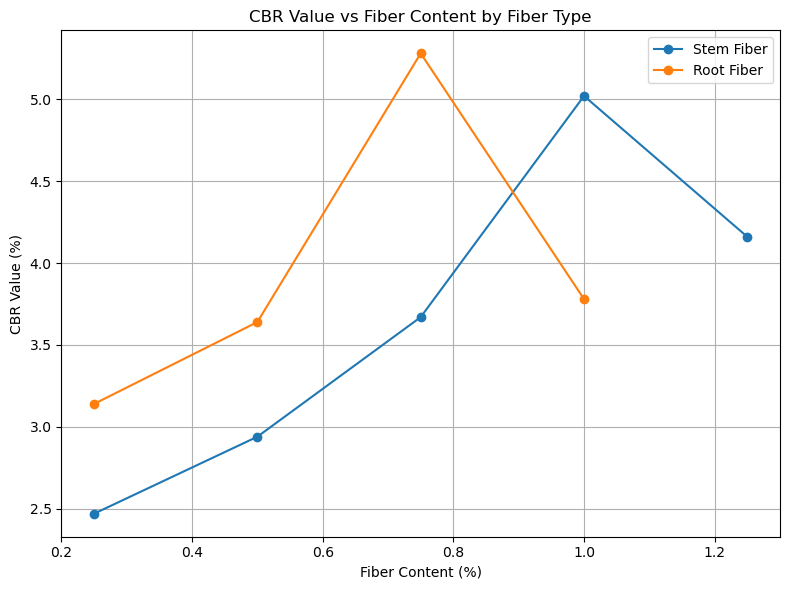

Plots saved in: C:\Users\Vision


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# Original dataset
data = {
    'Fiber_Content': [0.25, 0.5, 0.75, 1.0, 1.25, 0.25, 0.5, 0.75, 1.0],  # % fiber
    'Fiber_Type': [0, 0, 0, 0, 0, 1, 1, 1, 1],  # Stem=0, Root=1
    'Dry_Density': [1.525, 1.508, 1.510, 1.534, 1.532, 1.47, 1.49, 1.49, 1.48],
    'Moisture_Content': [18.48, 16.21, 16.90, 16.21, 16.09, 15.27, 14.23, 12.79, 14.06],
    'CBR_Value': [2.47, 2.94, 3.67, 5.02, 4.16, 3.14, 3.64, 5.28, 3.78]
}

df = pd.DataFrame(data)

# Function to generate synthetic data by adding noise
def generate_synthetic_data(df, n_samples=1000, noise_level=0.05):
    np.random.seed(42)
    synthetic_rows = []
    for _ in range(n_samples):
        base_idx = np.random.randint(0, len(df))
        base_row = df.iloc[base_idx]

        fiber_content = base_row['Fiber_Content'] + np.random.normal(0, noise_level * base_row['Fiber_Content'])
        fiber_content = np.clip(fiber_content, 0, None)

        dry_density = base_row['Dry_Density'] + np.random.normal(0, noise_level * base_row['Dry_Density'])
        dry_density = np.clip(dry_density, 0, None)

        moisture_content = base_row['Moisture_Content'] + np.random.normal(0, noise_level * base_row['Moisture_Content'])
        moisture_content = np.clip(moisture_content, 0, None)

        fiber_type = base_row['Fiber_Type']

        cbr_value = base_row['CBR_Value'] + np.random.normal(0, noise_level * base_row['CBR_Value'])
        cbr_value = max(cbr_value, 0)

        synthetic_rows.append({
            'Fiber_Content': fiber_content,
            'Fiber_Type': fiber_type,
            'Dry_Density': dry_density,
            'Moisture_Content': moisture_content,
            'CBR_Value': cbr_value
        })

    return pd.DataFrame(synthetic_rows)

# Generate synthetic data
df_synthetic = generate_synthetic_data(df, n_samples=1000, noise_level=0.05)

# Combine data
df_combined = pd.concat([df, df_synthetic], ignore_index=True)

# Features and target
X = df_combined[['Fiber_Content', 'Fiber_Type', 'Dry_Density', 'Moisture_Content']]
y = df_combined['CBR_Value']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance Metrics on Extended Dataset:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Predict on all data for plotting
y_pred_all = rf.predict(X)

# Plot Actual vs Predicted CBR
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_all, color='blue', label='Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal fit (y=x)')
plt.xlabel('Actual CBR Value (%)')
plt.ylabel('Predicted CBR Value (%)')
plt.title('Actual vs Predicted CBR Values (Original + Synthetic)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted_cbr_extended.png")
plt.show()

# Feature Importance Plot (Seaborn version)
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("feature_importance_seaborn.png")
plt.show()

# Feature Importance Plot (Matplotlib version, sorted)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Sorted)')
plt.tight_layout()
plt.savefig("feature_importance_matplotlib.png")
plt.show()

# Plot CBR vs Fiber Content by Fiber Type (original df)
plt.figure(figsize=(8,6))
for fiber_type in df['Fiber_Type'].unique():
    subset = df[df['Fiber_Type'] == fiber_type]
    label = 'Stem Fiber' if fiber_type == 0 else 'Root Fiber'
    plt.plot(subset['Fiber_Content'], subset['CBR_Value'], marker='o', label=label)

plt.xlabel('Fiber Content (%)')
plt.ylabel('CBR Value (%)')
plt.title('CBR Value vs Fiber Content by Fiber Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cbr_vs_fiber_content.png")
plt.show()

# Print current working directory where plots are saved
print("Plots saved in:", os.getcwd())
